In [18]:
# Define the path to your COCO dataset annotations and images
data_dir = 'C:\\Users\\ICMR-MIT\\Downloads\\icmr_project\\data'
datasets = ['dataset_1.json', 'dataset_2.json', 'dataset_3.json', 'dataset_4.json', 'dataset_5.json']
image_dir = 'images'  # Modify this according to your dataset

In [19]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [20]:
def DataLoader(dataset_list):
    data_dir = 'C:\\Users\\ICMR-MIT\\Downloads\\icmr_project\\data'
    image_dir = 'images'

    image_list, mask_list = [], []

    for dataset in dataset_list:
        # Load the COCO dataset
        coco_api = COCO(os.path.join(data_dir, dataset))
    
        # Get the image IDs
        image_ids = coco_api.getImgIds()

        for image_id in image_ids:
            # Get the image info
            image_info = coco_api.loadImgs(image_id)[0]

            # Load the image
            image = cv2.imread(os.path.join(data_dir, os.path.join(image_dir, image_info['file_name'])))

            # Get the annotations for the image
            ann_ids = coco_api.getAnnIds(imgIds=image_id)
            anns = coco_api.loadAnns(ann_ids)

            mask = [coco_api.annToMask(ann) for ann in anns]
            if len(mask) == 0:
                continue
            mask = np.reshape(mask, (600, 800))

            image_list.append(image)
            mask_list.append(mask)
    
    return image_list, mask_list


In [21]:
def preprocess():
    datasets = ['dataset_1.json', 'dataset_2.json', 'dataset_3.json', 'dataset_4.json', 'dataset_5.json']
    images, masks = DataLoader(datasets)

    input_shape = (128, 128, 3) 
    
    images_resized = [cv2.resize(image, (input_shape[1], input_shape[0])) for image in images]
    masks_resized = [cv2.resize(mask, (input_shape[1], input_shape[0])) for mask in masks]

    images_array = np.array(images_resized) / 255.0 
    masks_array = np.array(masks_resized)

    masks_array_resized = [cv2.resize(mask, (128, 128)) for mask in masks]
    masks_array_resized = np.expand_dims(masks_array_resized, axis=-1) 

    return images_array, masks_array_resized

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


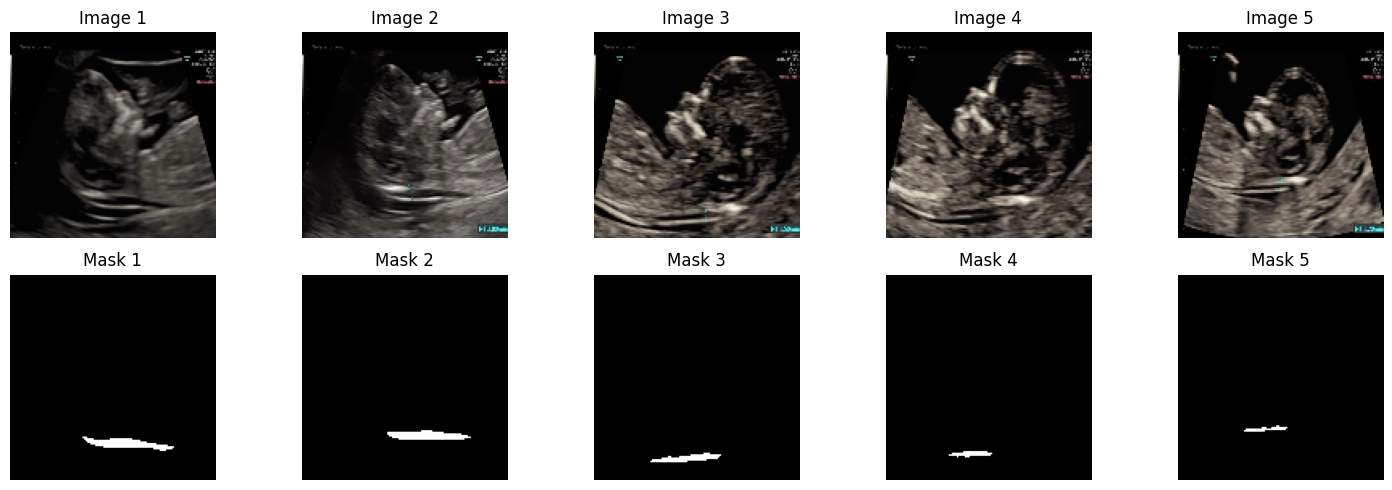

In [22]:
# Load and preprocess the data
images, masks = load_and_preprocess_data()

plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title('Image {}'.format(i+1))
    plt.axis('off')

    plt.subplot(2, 5, i+6)
    plt.imshow(masks[i], cmap='gray')
    plt.title('Mask {}'.format(i+1))
    plt.axis('off')

plt.tight_layout()
plt.show()

# Split the dataset into training and testing sets
split = int(len(images) * 0.7)
train_images, test_images = images[:split], images[split:]
train_masks, test_masks = masks[:split], masks[split:]

In [23]:
# Import necessary modules
from tensorflow.keras import applications
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [24]:
# Define input_shape
input_shape = (128, 128, 3)  # Adjust input shape based on your model


In [25]:
import tensorflow.keras.models as models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
# Define SegNet model
def segnet_model(input_shape):
    inputs = Input(shape=input_shape)

    # Encoder
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # Decoder
    up1 = UpSampling2D(size=(2, 2))(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(up1)

    up2 = UpSampling2D(size=(2, 2))(conv3)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2)

    model = Model(inputs=inputs, outputs=decoded)
    return model

In [27]:
# Create the EfficientNet model for segmentation
Model = segnet_model(input_shape)
Model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

Epoch 1/10
42/42 [==============================] - 11s 259ms/step - loss: 0.1295 - accuracy: 0.9923 - val_loss: 0.0462 - val_accuracy: 0.9926
Epoch 2/10
42/42 [==============================] - 12s 276ms/step - loss: 0.0418 - accuracy: 0.9928 - val_loss: 0.0376 - val_accuracy: 0.9926
Epoch 3/10
42/42 [==============================] - 12s 278ms/step - loss: 0.0298 - accuracy: 0.9928 - val_loss: 0.0242 - val_accuracy: 0.9926
Epoch 4/10
42/42 [==============================] - 12s 276ms/step - loss: 0.0217 - accuracy: 0.9928 - val_loss: 0.0203 - val_accuracy: 0.9926
Epoch 5/10
42/42 [==============================] - 12s 278ms/step - loss: 0.0196 - accuracy: 0.9933 - val_loss: 0.0184 - val_accuracy: 0.9938
Epoch 6/10
42/42 [==============================] - 12s 282ms/step - loss: 0.0177 - accuracy: 0.9942 - val_loss: 0.0183 - val_accuracy: 0.9944
Epoch 7/10
42/42 [==============================] - 12s 282ms/step - loss: 0.0168 - accuracy: 0.9945 - val_loss: 0.0162 - val_accuracy: 0.9946

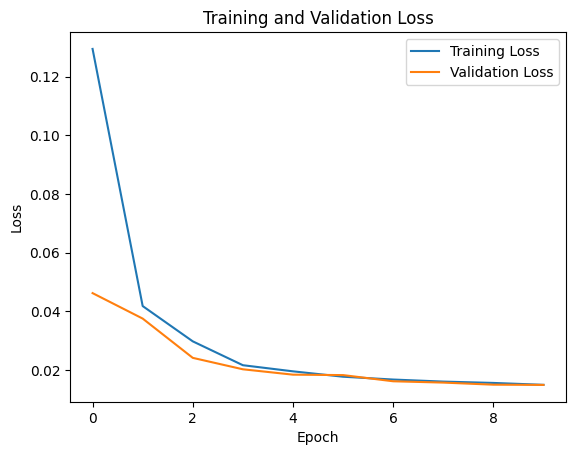

In [29]:
# Continue with the rest of the code
history = Model.fit(train_images, train_masks, epochs=10, batch_size=16, validation_split=0.2)
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
batch_size = 16  # Set the batch size according to your preference

# Evaluate the model on the test set
test_loss, test_accuracy = Model.evaluate(test_images, test_masks)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


12/12 [==============================] - 2s 127ms/step - loss: 0.0158 - accuracy: 0.9948
Test Loss: 0.0158
Test Accuracy: 99.48%


12/12 [==============================] - 2s 125ms/step


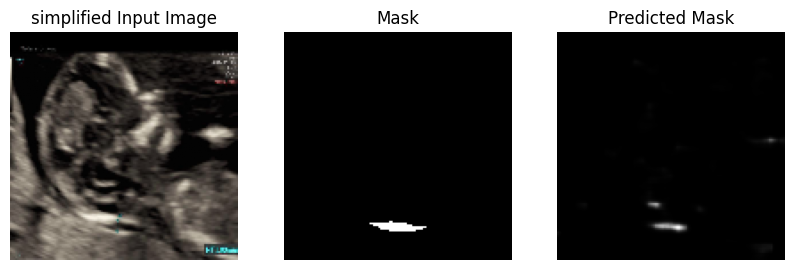

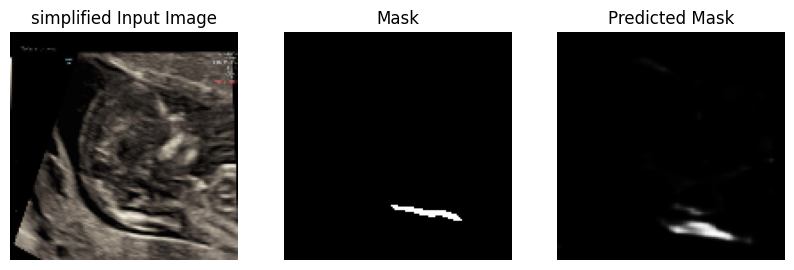

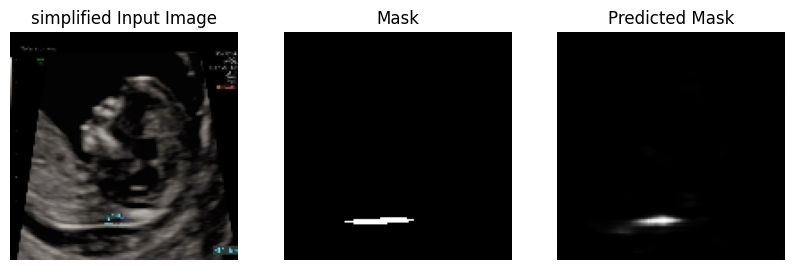

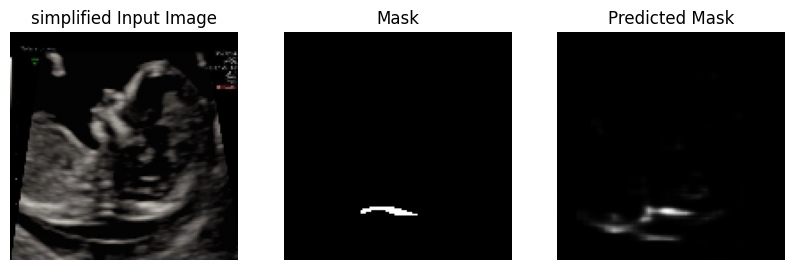

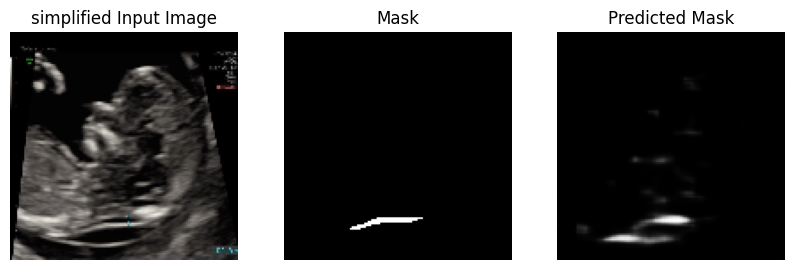

In [31]:
# Make predictions on the test set
predictions = Model.predict(test_images)

# Visualize a few samples from the test set
import matplotlib.pyplot as plt

num_samples_to_visualize = 5

for i in range(num_samples_to_visualize):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(test_images[i])
    plt.title('simplified Input Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(test_masks[i].squeeze(), cmap='gray')
    plt.title('Mask')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(predictions[i].squeeze(), cmap='gray')
    plt.title('Predicted Mask')
    plt.axis('off')

    plt.show()

In [32]:
import cv2
import numpy as np

# Function to calculate the thickness of the largest connected component in millimeters
def calculate_thickness(binary_mask, scale_factor=1):
    # Apply connected components to find connected regions
    _, labels, stats, _ = cv2.connectedComponentsWithStats(binary_mask.astype(np.uint8))

    # Check if any connected components are found
    if len(stats) < 2:
        print("No connected components found. Adjust the threshold value.")
        return None

    # Find the index of the largest connected component
    largest_component_index = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1

    # Create a mask containing only the largest connected component
    largest_component_mask = (labels == largest_component_index).astype(np.uint8)

    # Calculate the thickness of the largest connected component in millimeters
    pixel_area = stats[largest_component_index, cv2.CC_STAT_AREA]
    thickness_mm = np.sqrt(pixel_area) / scale_factor

    return thickness_mm


In [36]:
# Example usage (replace this with your actual binary masks and scale factor)
predictions = np.random.rand(10, 256, 256)  # Replace this with your actual binary masks
scale_factor = 51.3  # Replace this with your actual scale factor

for idx, binary_mask in enumerate(predictions):
    # Example thresholding, you might need to adjust the threshold value
    binary_mask = (binary_mask > 0.5).astype(np.uint8)

    # Calculate the thickness
    thickness = calculate_thickness(binary_mask, scale_factor)

    # Classify based on the cutoff
    classification = "Increased" if thickness >= 3.5 else "Normal"

    print(f"Image {idx + 1}: Nuchal Translucency Thickness = {thickness:.2f} millimeters, Classification = {classification}")

Image 1: Nuchal Translucency Thickness = 3.50 millimeters, Classification = Normal
Image 2: Nuchal Translucency Thickness = 3.49 millimeters, Classification = Normal
Image 3: Nuchal Translucency Thickness = 3.48 millimeters, Classification = Normal
Image 4: Nuchal Translucency Thickness = 3.50 millimeters, Classification = Increased
Image 5: Nuchal Translucency Thickness = 3.49 millimeters, Classification = Normal
Image 6: Nuchal Translucency Thickness = 3.48 millimeters, Classification = Normal
Image 7: Nuchal Translucency Thickness = 3.51 millimeters, Classification = Increased
Image 8: Nuchal Translucency Thickness = 3.49 millimeters, Classification = Normal
Image 9: Nuchal Translucency Thickness = 3.51 millimeters, Classification = Increased
Image 10: Nuchal Translucency Thickness = 3.50 millimeters, Classification = Increased
